In [111]:
import numpy as np
import pandas as pd

In [112]:
test = pd.read_csv(r"/content/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [113]:
df = test.dropna()
df = df.drop("id", axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [114]:
test['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [115]:
df['gender'] = df['gender'].map({"Male" : 1, "Female" : 0})
df['ever_married'] = df['ever_married'].map({"Yes" : 1, "No" : 0})
df['work_type'] = df['work_type'].map({"children" : 1, "Never_worked" : 0, "Govt_job" : 2, "Self-employed" : 3, "Private" : 4})
df['Residence_type'] = df['Residence_type'].map({"Urban" : 1, "Rural" : 0})
df['smoking_status'] = df['smoking_status'].map({"formerly smoked" : 1, "never smoked" : 0, "smokes" : 2, "Unknown" : 3})


In [116]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,4,1,228.69,36.6,1,1
2,1.0,80.0,0,1,1,4,0,105.92,32.5,0,1
3,0.0,49.0,0,0,1,4,1,171.23,34.4,2,1
4,0.0,79.0,1,0,1,3,0,174.12,24.0,0,1
5,1.0,81.0,0,0,1,4,1,186.21,29.0,1,1
6,1.0,74.0,1,1,1,4,0,70.09,27.4,0,1
7,0.0,69.0,0,0,0,4,1,94.39,22.8,0,1
9,0.0,78.0,0,0,1,4,1,58.57,24.2,3,1
10,0.0,81.0,1,0,1,4,0,80.43,29.7,0,1
11,0.0,61.0,0,1,1,2,0,120.46,36.8,2,1


In [117]:
x = df.drop('stroke', axis = 1)
y = df['stroke']

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [119]:
x_train.shape

(3927, 10)

In [120]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [122]:
imputer = SimpleImputer(strategy="mean")
x_train = imputer.fit_transform(x_train)
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [123]:
lr_pred = lr.predict(x_test)
lr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
print(y_test)

4336    0
3709    0
964     0
2647    0
3262    0
       ..
1022    0
205     1
3838    0
5010    0
1559    0
Name: stroke, Length: 982, dtype: int64


In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
print(accuracy_score(y_test,lr_pred))
cm = confusion_matrix(y_test,lr_pred)
print(cm)

0.9460285132382892
[[929   0]
 [ 53   0]]


Text(50.722222222222214, 0.5, 'True Value')

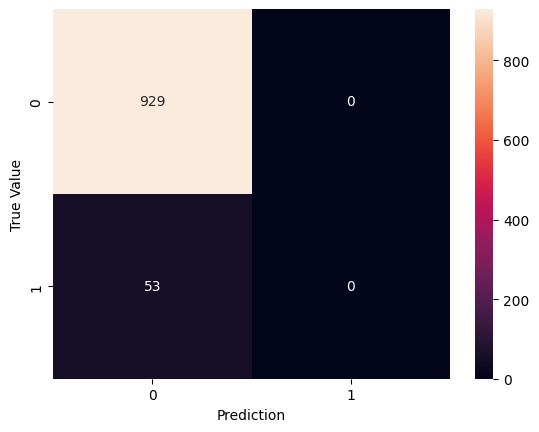

In [127]:
sns.heatmap(cm, annot = True , fmt ='d')
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [128]:
lr_acc = accuracy_score(y_test,lr_pred)

In [129]:
res = pd.DataFrame()
res

""


In [130]:
temp_res = pd.DataFrame({'Algorithum' :['Logistic Regression Method'],'Accuracy' : [lr_acc]})
res = pd.concat([res, temp_res])
res[['Algorithum','Accuracy']]

,Algorithum,Accuracy
0,Logistic Regression Method,0.946029


In [131]:
from sklearn.tree import DecisionTreeClassifier
Decision_class = DecisionTreeClassifier()
Decision_class.fit(x_train,y_train)

DecisionTreeClassifier()

In [132]:
y_pred_dr = Decision_class.predict(x_test)
y_pred_dr
dr_acc = accuracy_score(y_test,lr_pred)


In [133]:
print(accuracy_score(y_test,y_pred_dr))
cm = confusion_matrix(y_test,y_pred_dr)
print(cm)

0.905295315682281
[[883  46]
 [ 47   6]]


Text(50.722222222222214, 0.5, 'True Value')

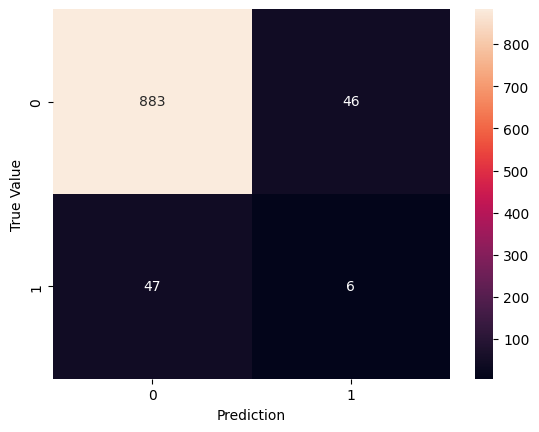

In [134]:
sns.heatmap(cm, annot = True , fmt ='d')
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [135]:
temp_res = pd.DataFrame({'Algorithum' :['Decision Tree Classifier'],'Accuracy' : [dr_acc]})
res = pd.concat([res, temp_res])
res[['Algorithum','Accuracy']]

,Algorithum,Accuracy
0,Logistic Regression Method,0.946029
0,Decision Tree Classifier,0.946029


In [136]:
from sklearn.ensemble import RandomForestClassifier
Random_Classifier = RandomForestClassifier()
Random_Classifier.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
y_pred_rr = Random_Classifier.predict(x_test)
y_pred_rr
rr_acc = accuracy_score(y_test,lr_pred)

In [138]:
print(accuracy_score(y_test,y_pred_rr))
cm = confusion_matrix(y_test,y_pred_rr)
print(cm)

0.9460285132382892
[[929   0]
 [ 53   0]]


Text(50.722222222222214, 0.5, 'True Value')

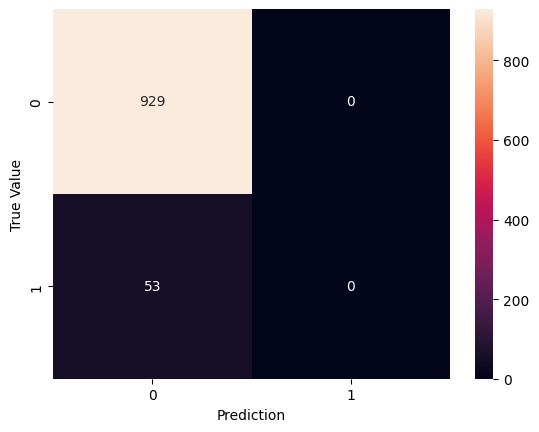

In [139]:
sns.heatmap(cm, annot = True , fmt ='d')
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [140]:
temp_res = pd.DataFrame({'Algorithum' :['Random Forest Classifier'],'Accuracy' : [rr_acc]})
res = pd.concat([res, temp_res])
res[['Algorithum','Accuracy']]

,Algorithum,Accuracy
0,Logistic Regression Method,0.946029
0,Decision Tree Classifier,0.946029
0,Random Forest Classifier,0.946029


In [141]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [142]:
print(accuracy_score(y_test,lr_pred))
cm = confusion_matrix(y_test,lr_pred)
print(cm)

0.9460285132382892
[[929   0]
 [ 53   0]]


Text(50.722222222222214, 0.5, 'True Value')

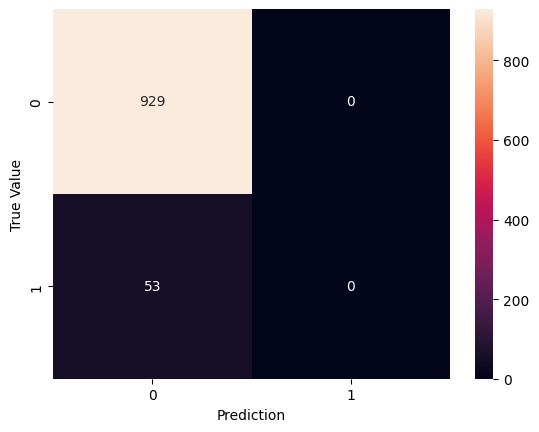

In [143]:
sns.heatmap(cm, annot = True , fmt ='d')
plt.xlabel("Prediction")
plt.ylabel("True Value")

In [156]:
def prediction(gender = 1, age = 50, hypertension = 0, heart_disease = 0, ever_married = 0 , work_type = 0 , Residence_type = 0, avg_glucose_level = 59.0, bmi = 15, smoking_status = 0):
  temp_arr = [gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status]
  temp_array = np.array(temp_array).reshape(1,-1)
  return int(svc.predict(temp_array))

In [ ]:
temp = input("Enter the Gender of the patient (M/F)? : ")
if temp == 'M':gender = 1
else: gender = 0

age = int(input("Enter the Age of the patient : "))

temp = input("Does the patient have hypertension (Y/N)? : ")
if temp == 'Yes' or temp == 'Y' : hypertension = 1
else : hypertension = 0

temp = input("Does the patient have Heart Disease (Y/N)? : ")
if temp == 'Yes' or temp == 'Y' : heart_disease = 1
else : heart_disease = 0

temp = input("Is the patient Married (Y/N)? : ")
if temp == 'Yes' or temp == 'Y' : ever_married = 1
else : ever_married = 0

work_type = int(input("Enter the working type :\n1.Never_worked\n2.children\n3.Govt Job\n4.Self-employed\n5.Private"))-1

temp = input("Does the patient belong to Urban or Rural area (U/R)? : ")
if temp == 'U' or temp == 'Urban' : Residence_type = 1
else : Residence_type = 0

avg_glucose_level = float(input("Enter the Avg Glucose Level of the patient : "))


bmi = float(input("Enter the BMI of the patient : "))

smoking_status = int(input("Enter the working type :\n1.never smoked\n2.formerly smoked\n3.smokes\n4.Unknown"))-1

val = prediction(gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status)

if val == 1 : print('Patient is having a high chance of having an heart attack')
else : print('Patient does not have a risk heart attack at currrent stage ')

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [162]:
import pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(svc, file)